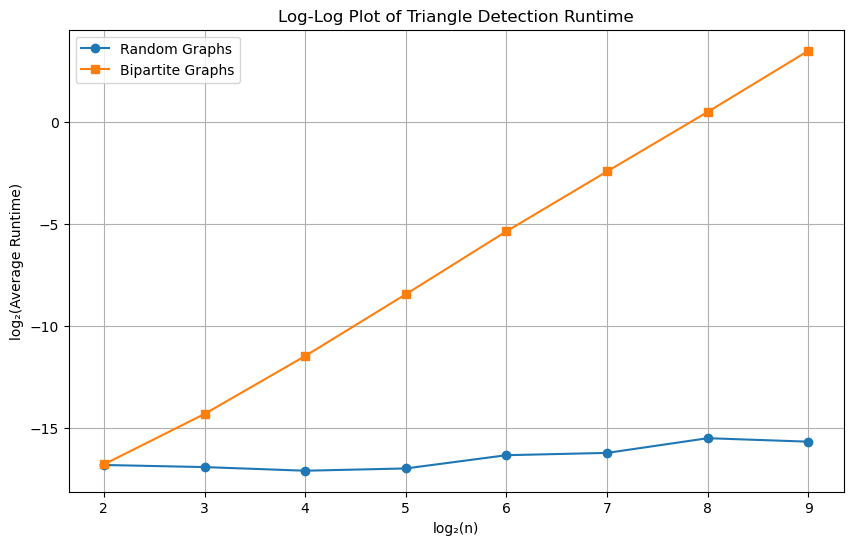

In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

def confirmTriangle(A):
    n = len(A)
    for v in range(n):
        for w in range(v + 1, n):
            if A[v][w] == 1:
                for u in range(n):
                    if u != v and u != w:
                        if A[u][v] == 1 and A[u][w] == 1:
                            return True
    return False

def generate_random_graph(n):
    A = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < 0.5:
                A[i][j] = A[j][i] = 1
    return A

def generate_bipartite_graph(n):
    A = np.zeros((n, n), dtype=int)
    half = n // 2
    for i in range(half):
        for j in range(half, n):
            if random.random() < 0.5:
                A[i][j] = A[j][i] = 1
    return A

# Experiment parameters
sizes = [4, 8, 16, 32, 64, 128, 256, 512]
trials = 50
random_times = []
bipartite_times = []

# Run experiment
for n in sizes:
    random_trial_times = []
    bipartite_trial_times = []
    for _ in range(trials):
        # Random graph
        A_random = generate_random_graph(n)
        start = time.perf_counter()
        confirmTriangle(A_random)
        random_trial_times.append(time.perf_counter() - start)
        # Bipartite graph
        A_bipartite = generate_bipartite_graph(n)
        start = time.perf_counter()
        confirmTriangle(A_bipartite)
        bipartite_trial_times.append(time.perf_counter() - start)
    random_times.append(np.mean(random_trial_times))
    bipartite_times.append(np.mean(bipartite_trial_times))

# Convert to log scale
log_n = [np.log2(n) for n in sizes]
log_random_times = [np.log2(t) for t in random_times]
log_bipartite_times = [np.log2(t) for t in bipartite_times]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(log_n, log_random_times, marker='o', label='Random Graphs')
plt.plot(log_n, log_bipartite_times, marker='s', label='Bipartite Graphs')
plt.xlabel('log₂(n)')
plt.ylabel('log₂(Average Runtime)')
plt.title('Log-Log Plot of Triangle Detection Runtime')
plt.legend()
plt.grid(True)
plt.show()

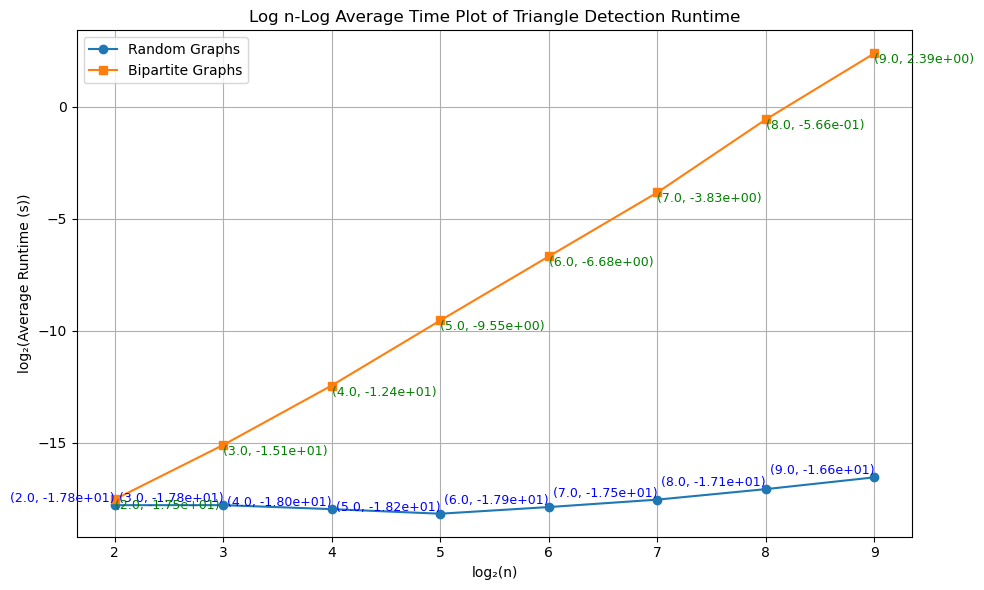

In [5]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

def confirmTriangle(A):
    n = len(A)
    for v in range(n):
        for w in range(v + 1, n):
            if A[v][w] == 1:
                for u in range(n):
                    if u != v and u != w:
                        if A[u][v] == 1 and A[u][w] == 1:
                            return True
    return False

def generate_random_graph(n):
    A = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < 0.5:
                A[i][j] = A[j][i] = 1
    return A

def generate_bipartite_graph(n):
    A = np.zeros((n, n), dtype=int)
    half = n // 2
    for i in range(half):
        for j in range(half, n):
            if random.random() < 0.5:
                A[i][j] = A[j][i] = 1
    return A

# Experiment parameters
sizes = [4, 8, 16, 32, 64, 128, 256, 512]
# sizes = [4, 8, 16, 32, 64]
trials = 50
random_times = []
bipartite_times = []

# Run experiment
for n in sizes:
    random_trial_times = []
    bipartite_trial_times = []
    for _ in range(trials):
        # Random graph
        A_random = generate_random_graph(n)
        start = time.perf_counter()
        confirmTriangle(A_random)
        random_trial_times.append(time.perf_counter() - start)
        # Bipartite graph
        A_bipartite = generate_bipartite_graph(n)
        start = time.perf_counter()
        confirmTriangle(A_bipartite)
        bipartite_trial_times.append(time.perf_counter() - start)
    random_times.append(np.mean(random_trial_times))
    bipartite_times.append(np.mean(bipartite_trial_times))

# Convert to log scale
log_n = [np.log2(n) for n in sizes]
log_random_times = [np.log2(t) for t in random_times]
log_bipartite_times = [np.log2(t) for t in bipartite_times]
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(log_n, log_random_times, marker='o', label='Random Graphs')
plt.plot(log_n, log_bipartite_times, marker='s', label='Bipartite Graphs')

# Annotate each point with its coordinates
for x, y in zip(log_n, log_random_times):
    plt.text(x, y, f"({x:.1f}, {y:.2e})", fontsize=9, ha='right', va='bottom', color='blue')
for x, y in zip(log_n, log_bipartite_times):
    plt.text(x, y, f"({x:.1f}, {y:.2e})", fontsize=9, ha='left', va='top', color='green')

plt.xlabel('log₂(n)')
plt.ylabel('log₂(Average Runtime (s))')
plt.title('Log n-Log Average Time Plot of Triangle Detection Runtime')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
